#### KPI 1 and 2: Average trade rate

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from functions_v2 import *

home_path = r'C:\Users\joche\FIM Kernkompetenzzentrum\Projekt VIdES - Dokumente\General\07_Arbeitsordner\04_Ergebnisse\20220920_Ergebnisse_4_Wochen'
results = r'C:\Users\joche\FIM Kernkompetenzzentrum\Projekt VIdES - Dokumente\General\07_Arbeitsordner\04_Ergebnisse\20220920_Ergebnisse_4_Wochen\results'
out_path = r'C:\Users\joche\FIM Kernkompetenzzentrum\Projekt VIdES - Dokumente\General\07_Arbeitsordner\04_Ergebnisse\20220920_Ergebnisse_4_Wochen\results\Abbildungen\avg_trade_rate'

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
paths = [i.path for i in os.scandir(os.getcwd()) if i.is_dir() if any(x in i.name.lower() for x in ['use', 'case'])]
[get_use_case_nr(i) for i in paths]

['0', '1', '2', '2-1', '2-2', '3', '4', '5', '6']

In [3]:
# generic dict to barplot function
def plot_sc_dict_bar(d, title):
    fig, ax = plt.subplots(figsize = (12,5), facecolor='w')
    for key in d:
        t = ax.bar(key, round(d[key],2), color = (184/235,50/235,138/235))
        ax.bar_label(t, padding=3)
    ax.set_title(title)
    ax.set_ylabel('ct./kWh')
    sns.despine()
    
    return fig

#### Average trade rate for germany entitiy (top-down, problematic)

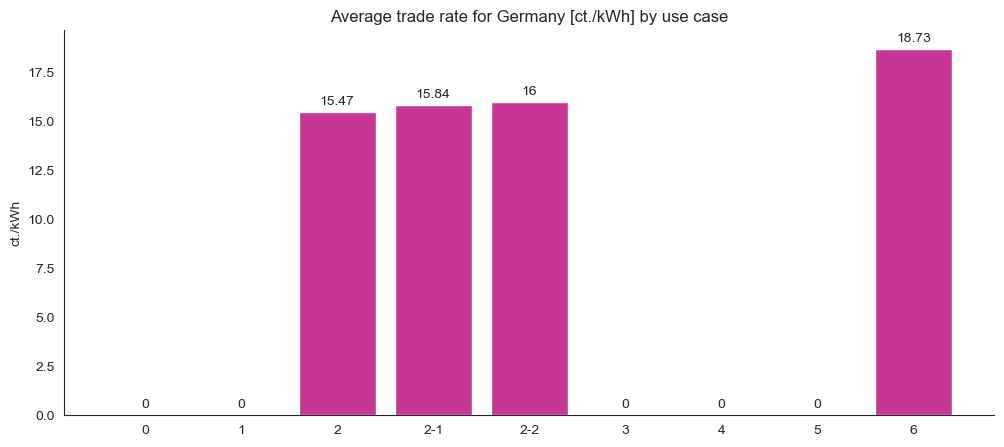

In [41]:
# collect average germany trade rate for each use case in dict
ger_dict = dict()
for p in paths:
    uc_nr = get_use_case_nr(p)
    df_temp = avg_p_germany(p)
    ger_dict[uc_nr] = df_temp['germany_avg trade rate [ct./kWh]'].mean(axis=0)
ger_dict.keys()

fig = plot_sc_dict_bar(ger_dict, 'Average trade rate for Germany [ct./kWh] by use case')

#### Average trade rate for germany (bottom-up)

In [ ]:
# collect average germany trade rate as average of all houses trade rate for each use case in dict -> takes 1h to execute...
ger_dict_v2 = dict()
for p in paths:
    uc_nr = get_use_case_nr(p)
    df_temp = avg_p_houses(p)
    ger_dict_v2[uc_nr] = df_temp[[i for i in df_temp.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
ger_dict_v2.keys()

In [35]:
df = avg_p_houses(paths[0])
df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)

,region_1_ec0_house_wind_avg trade rate [ct./kWh],region_1_ec1_house_0_avg trade rate [ct./kWh],region_1_ec1_house_1_avg trade rate [ct./kWh],region_1_ec1_house_10_avg trade rate [ct./kWh],region_1_ec1_house_11_avg trade rate [ct./kWh],region_1_ec1_house_12_avg trade rate [ct./kWh],region_1_ec1_house_13_avg trade rate [ct./kWh],region_1_ec1_house_14_avg trade rate [ct./kWh],region_1_ec1_house_15_avg trade rate [ct./kWh],region_1_ec1_house_16_avg trade rate [ct./kWh],...,region_6_ec4_house_2_avg trade rate [ct./kWh],region_6_ec4_house_20_avg trade rate [ct./kWh],region_6_ec4_house_3_avg trade rate [ct./kWh],region_6_ec4_house_4_avg trade rate [ct./kWh],region_6_ec4_house_5_avg trade rate [ct./kWh],region_6_ec4_house_6_avg trade rate [ct./kWh],region_6_ec4_house_7_avg trade rate [ct./kWh],region_6_ec4_house_8_avg trade rate [ct./kWh],region_6_ec4_house_9_avg trade rate [ct./kWh],region_6_ec5_house_industry_avg trade rate [ct./kWh]
0,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
1,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
2,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
3,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
4,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
164,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
165,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62
166,5.2,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,...,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,28.67,23.62


In [44]:
# uc0
df = avg_p_houses(paths[0])
avg_p_ger_0 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_0

26.866686555207586

In [45]:
# uc1
df = avg_p_houses(paths[1])
avg_p_ger_1 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_1

28.04111625710413

In [46]:
# uc2
df = avg_p_houses(paths[2])
avg_p_ger_2 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_2

22.129689310201925

In [48]:
# uc3
df = avg_p_houses(paths[5])
avg_p_ger_3 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_3

In [49]:
avg_p_ger_3

24.682323836433344

In [50]:
# uc4
df = avg_p_houses(paths[6])
avg_p_ger_4 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_4

24.84022762986527

In [4]:
# uc5
df = avg_p_houses(paths[7])
avg_p_ger_5 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_5

26.890408668087556

In [5]:
# uc6
df = avg_p_houses(paths[7])
avg_p_ger_6 = df[[i for i in df.columns if 'trade rate' in i]].mean(axis=1).mean(axis=0)
avg_p_ger_6

26.890408668087556

In [6]:
# combine avg prices to dict:
dict_out = {'Base Case': round(26.866686555207586,2),
            'Use case 1': round(28.04111625710413,2),
            'Use case 2': round(22.129689310201925,2),
            'Use case 3': round(24.682323836433344,2),
            'Use case 4': round(24.84022762986527,2),
            'Use case 5': round(26.890408668087556,2),
            'Use case 6': round(26.890408668087556,2),
            }

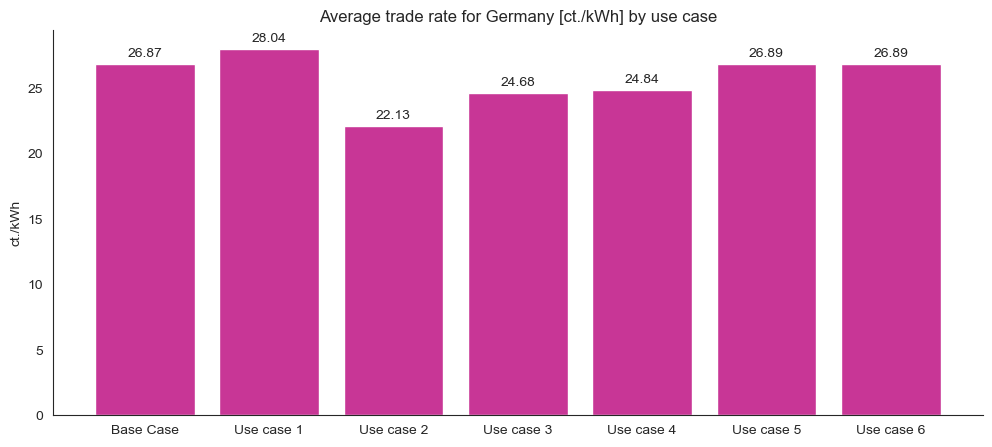

In [7]:
fig = plot_sc_dict_bar(dict_out, 'Average trade rate for Germany [ct./kWh] by use case')